## Denoising a signal that lies in a subspace


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n=1000
iterations = np.linspace(0,n,num=11).astype(int)
iterations[0] = 1

mse = []
std = []

#Random orthonormal matrix of size nxn
OM = np.linalg.svd(np.random.rand(n,n))
OM = OM[0]

#500 random points of dimension n
P = np.random.rand(n,500)

for k in iterations:

    # Orthonormal basis of the subspace, size nxk
    U = OM[:,0:k]

    # Project random points on the subspace
    # Note that here, we do not work with (U @ U.T) @ P directly, 
    # because U @ (U.T @ P) is computationally more efficient 
    X = U @ (U.T @ P)

    # Gaussian noise with mean 0, variance 1
    Z = np.random.normal(0, 1, size=(n,500))

    # Noisy observations
    Y = X + Z

    # Denoise
    X_hat = U @ (U.T @ Y)
    
    #average MSE 
    mse.append(np.average(np.sum((X-X_hat)**2,0)/np.sum(X**2,0)))
    
    #std of MSE
    std.append(np.std(np.sum((X-X_hat)**2,0)/np.sum(X**2,0)))

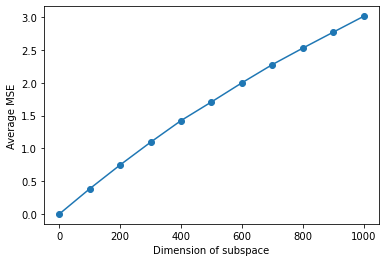

In [3]:
plt.xlabel('Dimension of subspace')
plt.ylabel('Average MSE')
x=iterations
plt.plot(x,mse,marker="o")
plt.show()

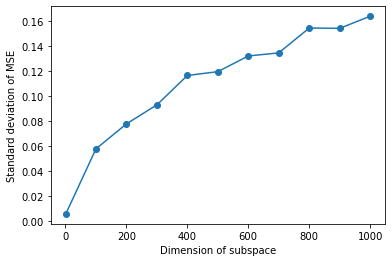

In [4]:
plt.xlabel('Dimension of subspace')
plt.ylabel('Standard deviation of MSE')
x=iterations
plt.plot(x,std,marker="o")
plt.show()